<a href="https://colab.research.google.com/github/aj123y/projects/blob/main/catvsdogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [12]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:31<00:00, 40.7MB/s]
100% 1.06G/1.06G [00:31<00:00, 36.8MB/s]


In [13]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement keras.layers (from versions: none)
ERROR: No matching distribution found for keras.layers


In [25]:
import tensorflow as tf
from tensorflow import keras

from keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense , Flatten ,BatchNormalization , Dropout

GENERATORS - BATCHES (DIVIDING THE DATA INTO BATCHES)
// Generators are very usefull for dealing with large amount of data

In [15]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode ='int',
    batch_size = 32,
    image_size = (256,256)

)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode ='int',
    batch_size = 32,
    image_size = (256,256)

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


Yaha p image numpy array ki format m store hua h ,, jo ki 1 se leke 256 ki range m hai -- or hame ise 0 - 1 tak kar na h toh basically hame (NORMALIZE) karna h 


In [16]:
# NORMALIZE
def process(image, label):
     image - tf.cast(image/255.,tf.float32)
     return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [26]:
# CREATING CNN MODEL

model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3),padding = 'valid',activation= 'relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),strides = 2 ,padding = 'valid'))

model.add(Conv2D(64,kernel_size = (3,3),padding = 'valid',activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),strides = 2 ,padding = 'valid'))

model.add(Conv2D(128,kernel_size = (3,3),padding = 'valid',activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),strides = 2 ,padding = 'valid'))

model.add(Flatten())

model.add(Dense(128,activation= 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation= 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation= 'sigmoid'))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [28]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'] )

In [29]:
history= model.fit(train_ds , epochs = 10 , validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 79s 124ms/step - loss: 1.2311 - accuracy: 0.5945 - val_loss: 0.6217 - val_accuracy: 0.6704
Epoch 2/10
625/625 [==============================] - 76s 121ms/step - loss: 0.5637 - accuracy: 0.7147 - val_loss: 0.7088 - val_accuracy: 0.7018
Epoch 3/10
625/625 [==============================] - 76s 121ms/step - loss: 0.4759 - accuracy: 0.7758 - val_loss: 0.5168 - val_accuracy: 0.7570
Epoch 4/10
625/625 [==============================] - 77s 123ms/step - loss: 0.4412 - accuracy: 0.7972 - val_loss: 0.5050 - val_accuracy: 0.7650
Epoch 5/10
625/625 [==============================] - 76s 121ms/step - loss: 0.3576 - accuracy: 0.8389 - val_loss: 0.7139 - val_accuracy: 0.7708
Epoch 6/10
625/625 [==============================] - 76s 121ms/step - loss: 0.2875 - accuracy: 0.8798 - val_loss: 0.5006 - val_accuracy: 0.7624
Epoch 7/10
625/625 [==============================] - 76s 122ms/step - loss: 0.2120 - accuracy: 0.9151 - val_loss: 0.9024 - val_ac

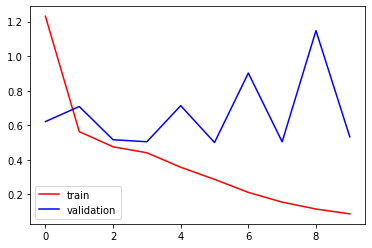

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color = 'red', label = 'train')
plt.plot(history.history['val_loss'],color = 'blue', label = 'validation')
plt.legend()
plt.show()


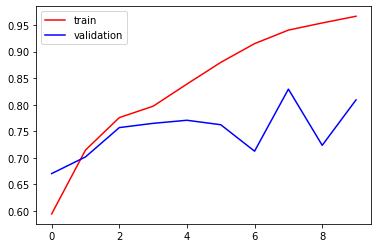

In [31]:
plt.plot(history.history['accuracy'],color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue', label = 'validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation
# L1/L2 
# Dropout
# Batch Norm
# Reduce complexity